<a href="https://colab.research.google.com/github/RobertoMel36/Metodos-numericos/blob/main/Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
def f(x):
  return -2 * x**4 + 6 * x**3 - 12 * x + 3

def Df(x):
  return -8 * x**3 + 18 * x**2 - 12

x0 = 1
i=1
error = 10
while error> 1e-10:
  x1= x0 - f(x0)/ Df(x0)
  error= abs (x1 - x0)
  x0=x1
  print("Iteracion",i, ", Raiz aproximada:" ,x0)
  i= i+1

Iteracion 1 , Raiz aproximada: -1.5
Iteracion 2 , Raiz aproximada: -1.3310810810810811
Iteracion 3 , Raiz aproximada: -1.293523745678972
Iteracion 4 , Raiz aproximada: -1.2917482942782157
Iteracion 5 , Raiz aproximada: -1.2917444223701793
Iteracion 6 , Raiz aproximada: -1.2917444223517893


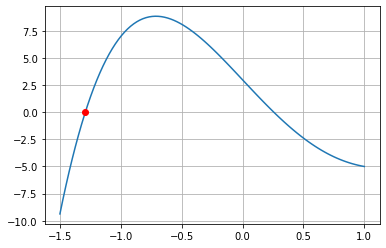

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(-1.5, 1, 100)
plt.plot(x, f(x))
plt.plot(x0, f(x0), 'or')
plt.grid()
plt.show()

In [ ]:
from fractions import Fraction
import math

def imprimirPolinomio(polinomio):
    textoPolinomio = ""
    for i in range(0, len(polinomio)):
        textoPolinomio = textoPolinomio + str(polinomio[i])+"x^"+str(len(polinomio)-1-i)+", "
    print(textoPolinomio)

def obtenerValorP(polinomio):
    valorP = int(math.fabs(polinomio[len(polinomio)-1]))
    print("El valor de P es "+str(valorP))
    return valorP

def obtenerValorQ(polinomio):
    valorQ = int(math.fabs(polinomio[0]))
    print("El valor de Q es "+str(valorQ))
    return valorQ

def obtenerDivisores(valor):
    divisores = []
    for i in range(1, valor+1):
        if(valor % i == 0):
            divisores.append(i)
            divisores.append(i*-1)
    return divisores

def mostrarDivisores(lista, letra):
    fraseDiv = "Los divisores de " + letra + " son "
    for i in range(0, len(lista)):
        fraseDiv = fraseDiv + str(lista[i])+", "
    print(fraseDiv)

def obtenerFactores(listaP, listaQ):
    factores = []
    for i in range(0, len(listaQ)):
        for j in range(0, len(listaP)):
            val = Fraction(listaP[j], listaQ[i])
            if not(val in factores):
                factores.append(val)
    return factores

def mostrarFactores(lista):
    fraseF = "Los factores son "
    for i in range(0, len(lista)):
        fraseF = fraseF + str(lista[i]) + ", "
    print(fraseF)

def divisionSintetica():
    flagPrincipal = False
    while flagPrincipal == False:
        grado = int(input("Escriba el grado del polinomio: "))
        polinomioOriginal = []
        for i in range(0, grado+1):
            val = int(input(f"Escriba el coeficiente del grado {grado-i}: "))
            polinomioOriginal.append(val)

        flagLista = False
        listaPolinomios = []
        listaFactores = []
        listaPolinomios.append(polinomioOriginal)

        while flagLista == False:
            polinomioActual = listaPolinomios[len(listaPolinomios)-1]
            if(len(polinomioActual) > 1):
                imprimirPolinomio(polinomioActual)
                valorP = obtenerValorP(polinomioActual)
                valorQ = obtenerValorQ(polinomioActual)
                divisoresP = obtenerDivisores(valorP)
                divisoresQ = obtenerDivisores(valorQ)
                mostrarDivisores(divisoresP, "P")
                mostrarDivisores(divisoresQ, "Q")
                factores = obtenerFactores(divisoresP, divisoresQ)
                mostrarFactores(factores)
                flagPolinomio = False

                for i in range(0, len(factores)):
                    factorActual = factores[i]
                    polinomioNuevo = []
                    polinomioNuevo.append(polinomioActual[0])
                    for j in range(1, len(polinomioActual)):
                        polinomioNuevo.append(polinomioActual[j]+(factorActual*polinomioNuevo[j-1]))
                    if(polinomioNuevo[len(polinomioNuevo)-1] == 0):
                        polinomioNuevo.remove(0)
                        listaFactores.append(factorActual)
                        listaPolinomios.append(polinomioNuevo)
                        flagPolinomio = True
                        break

                if(flagPolinomio):
                    print("El factor encontrado es "+str(factorActual))
                    print("Los coeficientes resultantes fueron ")
                    imprimirPolinomio(polinomioNuevo)
                    print("--------------------------------------------------------------")
                else:
                    print("--------------------------------------------------------------")
                    print("Este polinomio no puede ser resuelto de esta forma ya que contiene raíces complejas.")
                    mostrarFactores(listaFactores)
                    flagLista = True
            else:
                print("Ya se realizaron todas las divisiones posibles.")
                mostrarFactores(listaFactores)
                flagLista = True

        opcion = input("Teclee 's' para insertar un nuevo polinomio: ")
        if(opcion != 's'):
            flagPrincipal = True

        print("-------------------------------------------------------------------------")

if __name__ == "__main__":
    divisionSintetica()